# Project Numerical Analysis: 'Beams and Frameworks of Beams'

### Dependencies

In [1]:
from meshes import *

### Generate Mesh

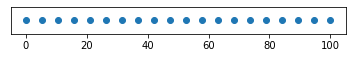

In [2]:
# Spatial resolution of mesh
N = 20

# Right limit of mesh
L = 100

# Generate 1D mesh
get_mesh_1D(N, [0,L], True);